<a href="https://colab.research.google.com/github/ArchanaSahoo89/Evaluation_Metrics_and_Regression_Implementation_Assignment/blob/main/Evaluation_Metrics_and_Regression_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    Theoretical:



    1. What does R-squared represent in a regression model?
R-squared represents the proportion of the variance in the dependent variable that is explained by the independent variables in the regression model. It is a measure of how well the model fits the data, ranging from 0 to 1.

    2. What are the assumptions of linear regression?
The key assumptions of linear regression are:

Linearity: The relationship between the dependent and independent variables is linear.

Independence: Observations are independent of each other.

Homoscedasticity: The variance of residuals is constant across all levels of the independent variables.

Normality of residuals: Residuals are normally distributed.

No multicollinearity: Independent variables are not highly correlated with each other.

    3. What is the difference between R-squared and Adjusted R-squared?
R-squared: Indicates the proportion of variance explained by the model but increases as more predictors are added, regardless of their relevance.
Adjusted R-squared: Adjusts for the number of predictors and only increases if the new predictor improves the model more than would be expected by chance.

    4. Why do we use Mean Squared Error (MSE)?
MSE is used to measure the average squared difference between predicted and actual values. It penalizes larger errors more heavily, making it sensitive to outliers and providing a way to gauge overall model accuracy.

    5. What does an Adjusted R-squared value of 0.85 indicate?
An Adjusted R-squared value of 0.85 indicates that 85% of the variance in the dependent variable is explained by the independent variables after adjusting for the number of predictors in the model.

    6. How do we check for normality of residuals in linear regression?
Visual methods: Use a Q-Q plot or histogram of residuals.
Statistical tests: Perform tests like the Shapiro-Wilk test or the Kolmogorov-Smirnov test.

    7. What is multicollinearity, and how does it impact regression?
Multicollinearity occurs when two or more independent variables are highly correlated. It impacts regression by making it difficult to determine the individual effect of each predictor, inflating standard errors, and reducing model interpretability.

    8. What is Mean Absolute Error (MAE)?
MAE is the average of the absolute differences between predicted and actual values. It provides a straightforward measure of prediction error, treating all errors equally without squaring them.

    9. What are the benefits of using an ML pipeline?
Automates and streamlines the workflow.
Ensures consistency in data preprocessing and modeling.
Reduces chances of errors.
Makes models easier to reproduce and deploy.
Allows for easy scaling and integration with real-time systems.

    10. Why is RMSE considered more interpretable than MSE?
RMSE is in the same unit as the dependent variable, making it easier to interpret directly in the context of the data, unlike MSE, which is in squared units.

    11. What is pickling in Python, and how is it useful in ML?
Pickling is the process of serializing Python objects into a byte stream to save them for later use. In ML, it is used to save trained models so they can be loaded and used without retraining.

    12. What does a high R-squared value mean?
A high R-squared value means that the model explains a large proportion of the variance in the dependent variable. However, it does not imply causation or a good fit on unseen data.

    13. What happens if linear regression assumptions are violated?
Linearity: Model predictions become biased.
Independence: Standard errors may be underestimated or overestimated.
Homoscedasticity: Inconsistent variance can lead to inefficiency in predictions.
Normality: Confidence intervals and hypothesis tests may become unreliable.
Multicollinearity: Model coefficients become unstable and less interpretable.

    14. How can we address multicollinearity in regression?
Remove one or more correlated predictors.
Combine correlated variables using techniques like PCA.
Use regularization methods like Ridge or Lasso regression.

    15. How can feature selection improve model performance in regression analysis?
Reduces noise and irrelevant information.
Improves model interpretability.
Prevents overfitting by reducing dimensionality.
Speeds up computation.

    16. How is Adjusted R-squared calculated?
Adjusted R
2
=
1
−
(
(
1
−
𝑅
2
)
(
𝑛
−
1
)
/
𝑛
−
𝑝
−
1
)

Where:

𝑛: Number of observations.

𝑝: Number of predictors.

    17. Why is MSE sensitive to outliers?
MSE squares the errors, which magnifies the impact of large errors. As a result, outliers contribute disproportionately to the MSE value.

    18. What is the role of homoscedasticity in linear regression?
Homoscedasticity ensures that the variance of errors is constant across all levels of the independent variable, which is essential for reliable parameter estimates and valid hypothesis tests.

    19. What is Root Mean Squared Error (RMSE)?
RMSE is the square root of the average of squared differences between predicted and actual values. It provides a measure of model error in the same units as the dependent variable.

    20. Why is pickling considered risky?
Pickled files can be vulnerable to code injection attacks if loaded from untrusted sources.
It is Python-specific and may not be compatible across versions or environments.

    21. What alternatives exist to pickling for saving ML models?
Joblib: Efficient for large objects.
ONNX: Framework-independent format.
PMML: Predictive Model Markup Language.
JSON/YAML: For saving lightweight models or configurations.

    22. What is heteroscedasticity, and why is it a problem?
Heteroscedasticity occurs when the variance of residuals is not constant across levels of the independent variables. It can lead to inefficient estimates and unreliable hypothesis tests.

    23. How can interaction terms enhance a regression model's predictive power?
Interaction terms allow the model to capture the combined effect of two variables on the dependent variable, improving accuracy when the relationship between predictors is not additive.


    Practical:

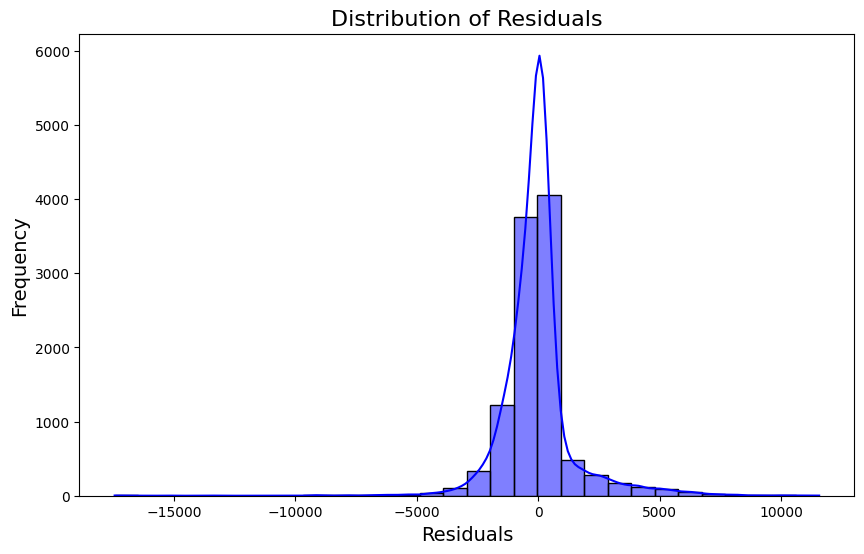

In [ ]:
# 1. Write a Python script to visualize the distribution of errors (residuals) for a multiple linear regression model using Seaborn's "diamonds" dataset.

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
df = sns.load_dataset('diamonds')

# Select features and target
X = df[['carat', 'depth', 'table', 'x', 'y', 'z']]
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Visualize the distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue', bins=30)
plt.title('Distribution of Residuals', fontsize=16)
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


In [ ]:
# 2. Write a Python script to calculate and print Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) for a linear regression model.

from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate errors
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Squared Error (MSE): 2242178.90
Mean Absolute Error (MAE): 888.48
Root Mean Squared Error (RMSE): 1497.39


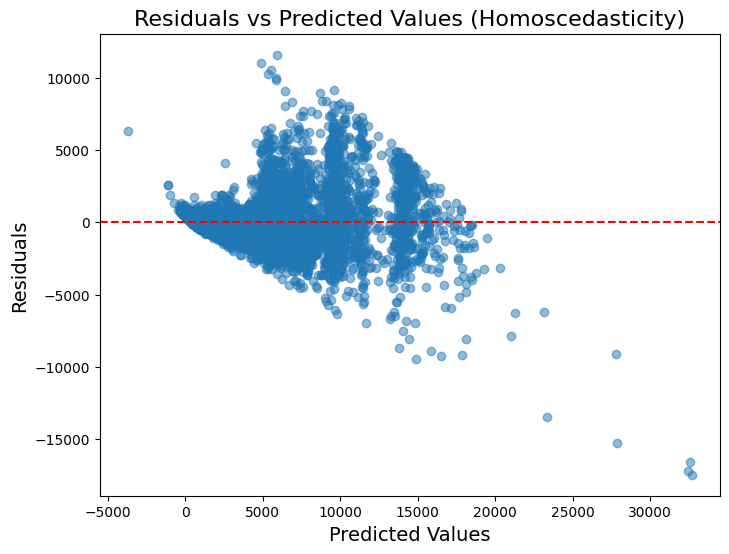

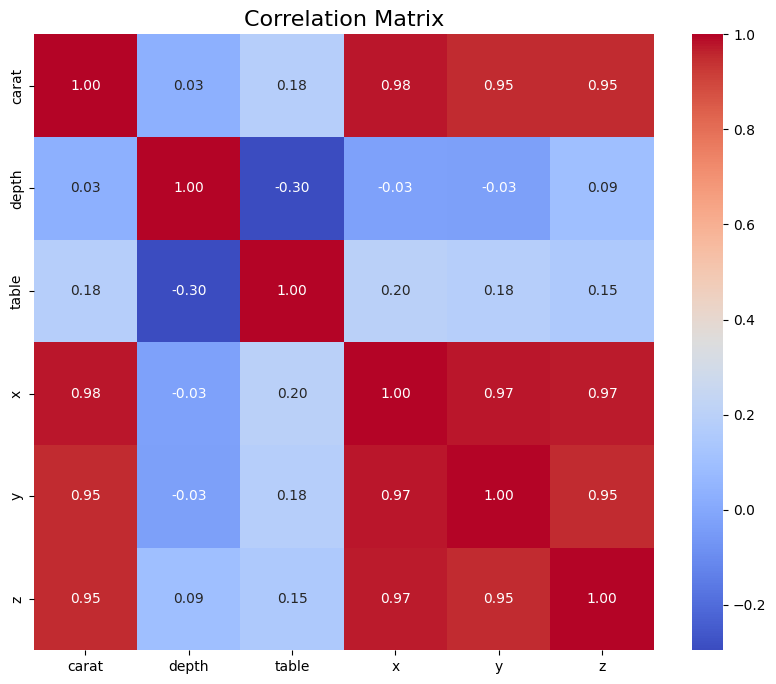

In [ ]:
# 3. Write a Python script to check if the assumptions of linear regression are met. Use a scatter plot to check linearity, residuals plot for homoscedasticity, and correlation matrix for multicollinearity

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot for linearity
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals vs Predicted Values (Homoscedasticity)", fontsize=16)
plt.xlabel("Predicted Values", fontsize=14)
plt.ylabel("Residuals", fontsize=14)
plt.show()

# Correlation matrix for multicollinearity
correlation_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix", fontsize=16)
plt.show()

Linear Regression - Cross-validation RMSE: 0.10 ± 0.00, Test RMSE: 0.11
Decision Tree - Cross-validation RMSE: 150.41 ± 7.76, Test RMSE: 143.25
Random Forest - Cross-validation RMSE: 91.17 ± 5.77, Test RMSE: 84.00


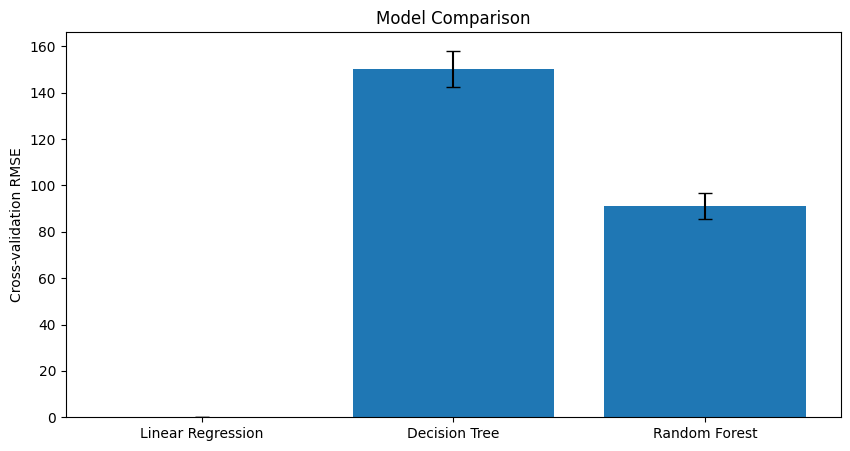

In [ ]:
# 4.  Write a Python script that creates a machine learning pipeline with feature scaling and evaluates the performance of different regression models

import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Generate a synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Convert to DataFrame for ease of use (optional)
data = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
data['target'] = y

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('target', axis=1), data['target'], test_size=0.2, random_state=42)

# Create pipelines for different regression models
pipelines = {
    'Linear Regression': Pipeline([('scaler', StandardScaler()), ('regressor', LinearRegression())]),
    'Decision Tree': Pipeline([('scaler', StandardScaler()), ('regressor', DecisionTreeRegressor(random_state=42))]),
    'Random Forest': Pipeline([('scaler', StandardScaler()), ('regressor', RandomForestRegressor(random_state=42))])
}

# Evaluate each pipeline using cross-validation
results = {}
for model_name, pipeline in pipelines.items():
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    results[model_name] = np.sqrt(-cv_scores)

# Train and evaluate each model on the test set
for model_name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    test_score = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{model_name} - Cross-validation RMSE: {results[model_name].mean():.2f} ± {results[model_name].std():.2f}, Test RMSE: {test_score:.2f}")

# Optionally, you can visualize the results
model_names = list(results.keys())
cv_means = [results[name].mean() for name in model_names]
cv_stds = [results[name].std() for name in model_names]

plt.figure(figsize=(10, 5))
plt.bar(model_names, cv_means, yerr=cv_stds, capsize=5)
plt.ylabel('Cross-validation RMSE')
plt.title('Model Comparison')
plt.show()


In [ ]:
# 5. Implement a simple linear regression model on a dataset and print the model's coefficients, intercept, and R-squared score.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Train model
model = LinearRegression()
model.fit(X_train[['carat']], y_train)

# Print coefficients
print(f"Coefficient: {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")

# Calculate R-squared
y_pred = model.predict(X_test[['carat']])
print(f"R-squared: {r2_score(y_test, y_pred):.2f}")


Coefficient: 7768.91
Intercept: -2261.91
R-squared: 0.85


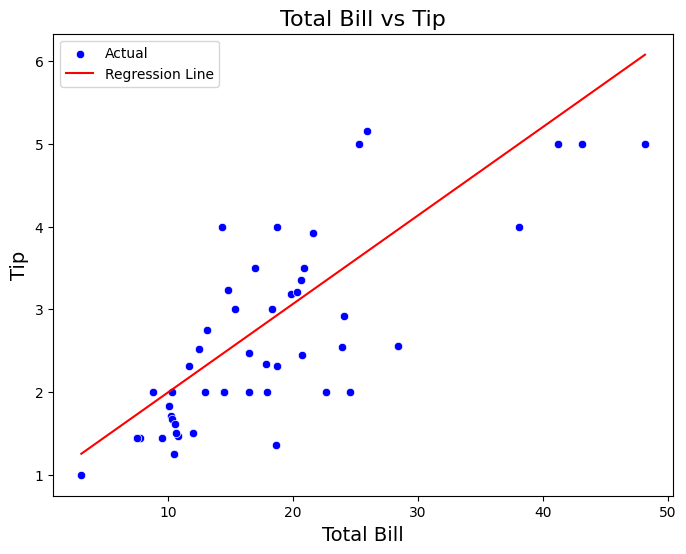

In [ ]:
# 6. Write a Python script that analyzes the relationship between total bill and tip in the 'tips' dataset using simple linear regression and visualizes the results.

# Import dataset
tips = sns.load_dataset('tips')

# Define features and target
X = tips[['total_bill']]
y = tips['tip']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and visualize
y_pred = model.predict(X_test)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test['total_bill'], y=y_test, color='blue', label='Actual')
sns.lineplot(x=X_test['total_bill'], y=y_pred, color='red', label='Regression Line')
plt.title("Total Bill vs Tip", fontsize=16)
plt.xlabel("Total Bill", fontsize=14)
plt.ylabel("Tip", fontsize=14)
plt.legend()
plt.show()

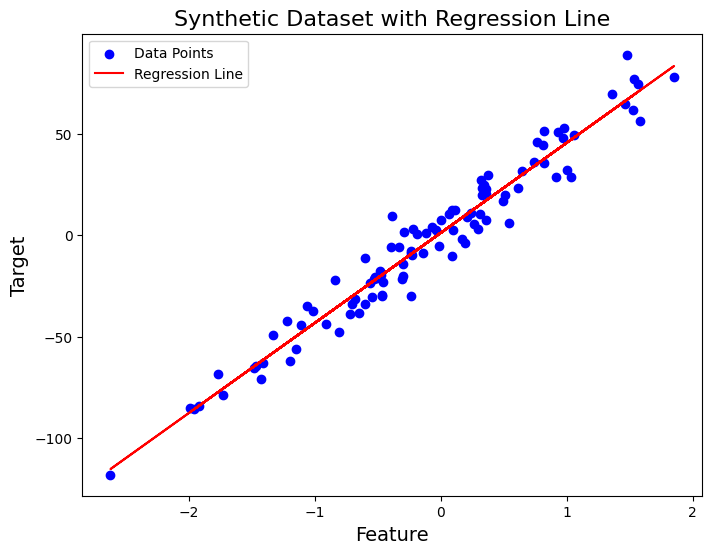

In [ ]:
# 7. Write a Python script that fits a linear regression model to a synthetic dataset with one feature. Use the model to predict new values and plot the data points along with the regression line

from sklearn.datasets import make_regression

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X, y)

# Predict and visualize
y_pred = model.predict(X)
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.title("Synthetic Dataset with Regression Line", fontsize=16)
plt.xlabel("Feature", fontsize=14)
plt.ylabel("Target", fontsize=14)
plt.legend()
plt.show()


In [ ]:
# 8. Write a Python script that pickles a trained linear regression model and saves it to a file

import pickle

# Save the model to a file
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Load the model
with open('linear_regression_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

print("Model loaded successfully:", loaded_model)


Model loaded successfully: LinearRegression()


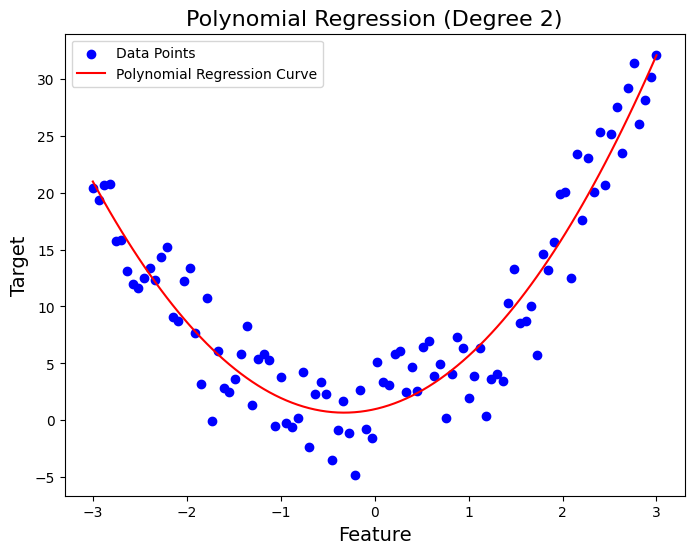

In [ ]:
# 9. Write a Python script that fits a polynomial regression model (degree 2) to a dataset and plots the regression curve.

from sklearn.preprocessing import PolynomialFeatures

# Generate synthetic data
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 3 * X**2 + 2 * X + np.random.randn(100, 1) * 3

# Polynomial transformation
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Train the model
model = LinearRegression()
model.fit(X_poly, y)

# Predict and plot
y_pred = model.predict(X_poly)
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', label='Polynomial Regression Curve')
plt.title("Polynomial Regression (Degree 2)", fontsize=16)
plt.xlabel("Feature", fontsize=14)
plt.ylabel("Target", fontsize=14)
plt.legend()
plt.show()


In [ ]:
# 10. Generate synthetic data for simple linear regression (use random values for X and y) and fit a linear regression model to the data. Print the model's coefficient and intercept

# Generate synthetic data
X = np.random.rand(100, 1) * 10
y = 5 * X + np.random.randn(100, 1) * 2

# Train model
model = LinearRegression()
model.fit(X, y)

# Print coefficients
print(f"Coefficient: {model.coef_[0][0]:.2f}")
print(f"Intercept: {model.intercept_[0]:.2f}")


Coefficient: 5.00
Intercept: -0.37


In [ ]:
# 11. Write a Python script that fits polynomial regression models of different degrees to a synthetic dataset and compares their performance.

degrees = [1, 2, 3, 4]
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)
    r2 = model.score(X_poly, y)
    print(f"Degree {degree}: R-squared = {r2:.2f}")

Degree 1: R-squared = 0.98
Degree 2: R-squared = 0.98
Degree 3: R-squared = 0.98
Degree 4: R-squared = 0.98


In [ ]:
# 12. Write a Python script that fits a simple linear regression model with two features and prints the model's coefficients, intercept, and R-squared score.

# Define features and target
X = df[['carat', 'depth']]
y = df['price']

# Train model
model.fit(X, y)

# Print coefficients and R-squared
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"R-squared: {model.score(X, y):.2f}")


Coefficients: [7765.14066377 -102.16532216]
Intercept: 4045.3331826016815
R-squared: 0.85


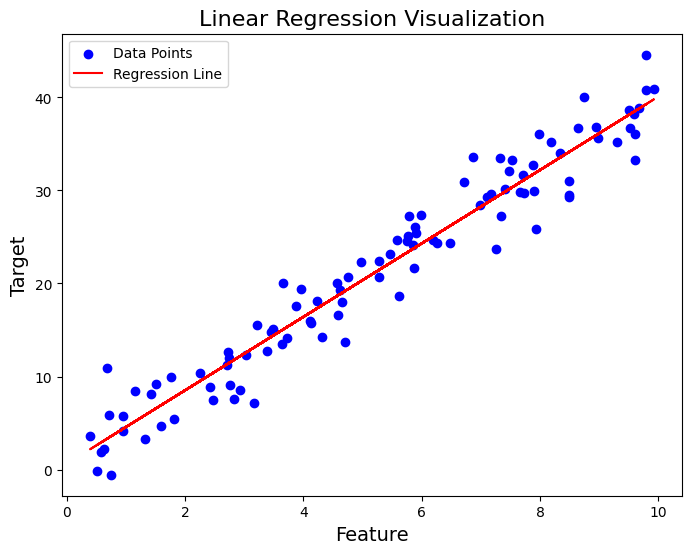

In [ ]:
# 13. Write a Python script that generates synthetic data, fits a linear regression model, and visualizes the regression line along with the data points.

# Generate data
X = np.random.rand(100, 1) * 10
y = 4 * X + np.random.randn(100, 1) * 3

# Train model
model.fit(X, y)

# Predict and plot
y_pred = model.predict(X)
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.title("Linear Regression Visualization", fontsize=16)
plt.xlabel("Feature", fontsize=14)
plt.ylabel("Target", fontsize=14)
plt.legend()
plt.show()

In [ ]:
# 14. Write a Python script that uses the Variance Inflation Factor (VIF) to check for multicollinearity in a dataset with multiple features.

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
X = df[['carat', 'depth', 'table', 'x', 'y', 'z']]
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


  Feature          VIF
0   carat    70.132799
1   depth   515.146274
2   table   500.595341
3       x  1284.949828
4       y   530.998218
5       z   540.677349


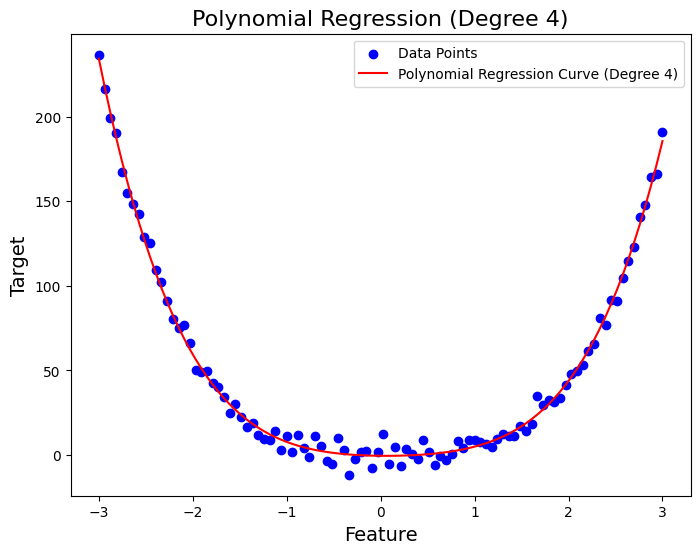

In [ ]:
# 15. Write a Python script that generates synthetic data for a polynomial relationship (degree 4), fits a polynomial regression model, and plots the regression curve.

# Generate synthetic data
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 2 * X**4 - X**3 + 5 * X**2 + np.random.randn(100, 1) * 5

# Polynomial transformation
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

# Train model
model = LinearRegression()
model.fit(X_poly, y)

# Predict and plot
y_pred = model.predict(X_poly)
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', label='Polynomial Regression Curve (Degree 4)')
plt.title("Polynomial Regression (Degree 4)", fontsize=16)
plt.xlabel("Feature", fontsize=14)
plt.ylabel("Target", fontsize=14)
plt.legend()
plt.show()

In [ ]:
# 16. Write a Python script that creates a machine learning pipeline with data standardization and a multiple linear regression model, and prints the R-squared score.

# Define pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

# Train and evaluate pipeline
pipeline.fit(X_train, y_train)
r2 = pipeline.score(X_test, y_test)
print(f"R-squared Score: {r2:.2f}")


R-squared Score: 0.54


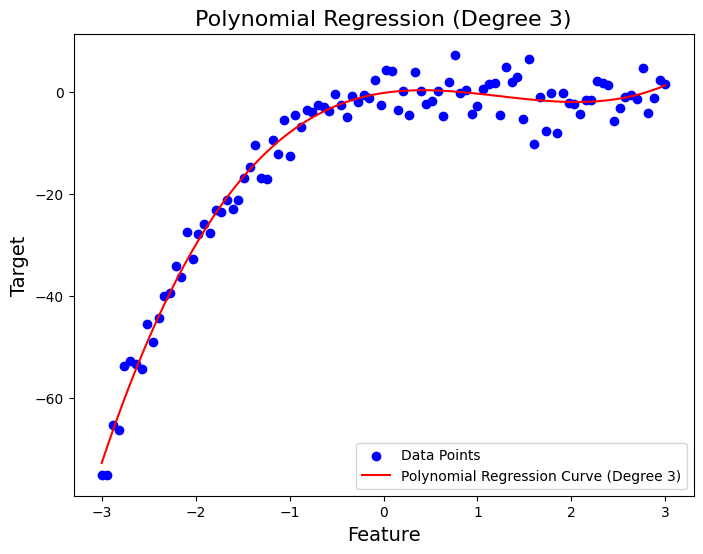

In [ ]:
# 17. Write a Python script that performs polynomial regression (degree 3) on a synthetic dataset and plots the regression curve

# Generate synthetic data
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = X**3 - 4 * X**2 + 3 * X + np.random.randn(100, 1) * 3

# Polynomial transformation
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Train model
model.fit(X_poly, y)

# Predict and plot
y_pred = model.predict(X_poly)
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', label='Polynomial Regression Curve (Degree 3)')
plt.title("Polynomial Regression (Degree 3)", fontsize=16)
plt.xlabel("Feature", fontsize=14)
plt.ylabel("Target", fontsize=14)
plt.legend()
plt.show()


In [ ]:
# 18. Write a Python script that performs multiple linear regression on a synthetic dataset with 5 features. Print the R-squared score and model coefficients.

# Generate synthetic data
X = np.random.rand(100, 5)
y = 3 * X[:, 0] + 2 * X[:, 1] + X[:, 2] + np.random.randn(100)

# Train model
model.fit(X, y)

# Print coefficients and R-squared
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"R-squared: {model.score(X, y):.2f}")


Coefficients: [ 3.54178808  1.92354118  0.98449758 -0.41077447  0.18557095]
Intercept: -0.1098252094837453
R-squared: 0.58


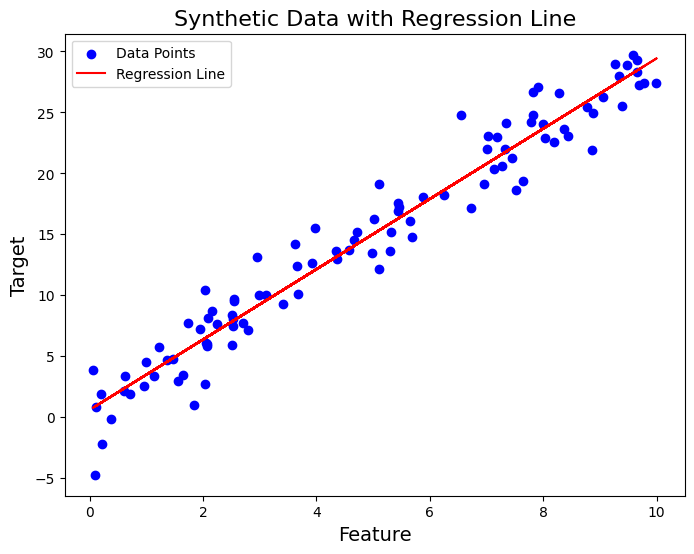

In [ ]:
# 19. Write a Python script that generates synthetic data for linear regression, fits a model, and visualizes the data points along with the regression line.

# Generate data
X = np.random.rand(100, 1) * 10
y = 3 * X + np.random.randn(100, 1) * 2

# Train model
model.fit(X, y)

# Predict and plot
y_pred = model.predict(X)
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.title("Synthetic Data with Regression Line", fontsize=16)
plt.xlabel("Feature", fontsize=14)
plt.ylabel("Target", fontsize=14)
plt.legend()
plt.show()


In [ ]:
# 20. Create a synthetic dataset with 3 features and perform multiple linear regression. Print the model's R squared score and coefficients

# Generate synthetic data
X = np.random.rand(100, 3)
y = 4 * X[:, 0] + 3 * X[:, 1] + 2 * X[:, 2] + np.random.randn(100)

# Train model
model.fit(X, y)

# Print coefficients and R-squared
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"R-squared: {model.score(X, y):.2f}")

Coefficients: [4.28892964 3.24396593 1.64425543]
Intercept: 0.08054751726248366
R-squared: 0.75


In [ ]:
# 21.  Write a Python script that demonstrates how to serialize and deserialize machine learning models using joblib instead of pickling

from joblib import dump, load

# Save the model to a file
dump(model, 'linear_model.joblib')

# Load the model
loaded_model = load('linear_model.joblib')

print("Model loaded successfully:", loaded_model)


Model loaded successfully: LinearRegression()


In [ ]:
# 22. Write a Python script to perform linear regression with categorical features using one-hot encoding. Use the Seaborn 'tips' dataset

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# One-hot encode categorical features
X = tips[['sex', 'smoker', 'day', 'time', 'total_bill']]
y = tips['tip']

# Define preprocessor
preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['sex', 'smoker', 'day', 'time'])
], remainder='passthrough')

# Preprocess and train model
X_processed = preprocessor.fit_transform(X)
model.fit(X_processed, y)

print(f"R-squared Score: {model.score(X_processed, y):.2f}")

R-squared Score: 0.46


In [ ]:
# 23. Compare Ridge Regression with Linear Regression on a synthetic dataset and print the coefficients and R squared score

from sklearn.linear_model import Ridge

# Generate synthetic data for Ridge Regression (similar to Linear Regression example)
X = np.random.rand(100, 3)  # 3 features for consistency with previous example
y = 4 * X[:, 0] + 3 * X[:, 1] + 2 * X[:, 2] + np.random.randn(100)

# Train Ridge Regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X, y)

# Train Linear Regression model for comparison (using the same synthetic data)
model = LinearRegression() # Reinitialize the model
model.fit(X, y)


# Compare results
print(f"Linear Regression R-squared: {model.score(X, y):.2f}")
print(f"Ridge Regression R-squared: {ridge.score(X, y):.2f}")
print(f"Ridge Coefficients: {ridge.coef_}")

Linear Regression R-squared: 0.73
Ridge Regression R-squared: 0.73
Ridge Coefficients: [3.76323243 2.76393994 1.8169499 ]


In [ ]:
# 24.  Write a Python script that uses cross-validation to evaluate a Linear Regression model on a synthetic dataset.

from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"Cross-Validated R-squared: {np.mean(scores):.2f}")



Cross-Validated R-squared: 1.00


In [ ]:
# 25. Write a Python script that compares polynomial regression models of different degrees and prints the R squared score for each

for degree in range(1, 6):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    model.fit(X_poly, y)
    r2 = model.score(X_poly, y)
    print(f"Degree {degree}: R-squared = {r2:.2f}")

Degree 1: R-squared = 1.00
Degree 2: R-squared = 1.00
Degree 3: R-squared = 1.00
Degree 4: R-squared = 1.00
Degree 5: R-squared = 1.00
